In [69]:
# Make sure that we use SageMaker 1.x
!pip install sagemaker==1.72.0

     |████████████████████████████████| 297 kB 17.6 MB/s eta 0:00:01
  Created wheel for sagemaker: filename=sagemaker-1.72.0-py2.py3-none-any.whl size=386358 sha256=ca33de7f9d130c8d16f82b334622bc4c5f2d6b2c62547e5f9965cac2daec406c
  Stored in directory: /home/ec2-user/.cache/pip/wheels/c3/58/70/85faf4437568bfaa4c419937569ba1fe54d44c5db42406bbd7
Successfully built sagemaker
  Attempting uninstall: smdebug-rulesconfig
    Found existing installation: smdebug-rulesconfig 1.0.1
    Uninstalling smdebug-rulesconfig-1.0.1:
      Successfully uninstalled smdebug-rulesconfig-1.0.1
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 2.25.2
    Uninstalling sagemaker-2.25.2:
      Successfully uninstalled sagemaker-2.25.2


In [21]:
#import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
#import the catapult data
catapult_data = pd.read_csv('catapult_data.csv')
print('shapeof the data',catapult_data.shape)
#print the first 20 columns of catapult data
catapult_data.head(20)

shapeof the data (459, 6)


,RA,FA,CE,PE,BP,distance
0,185,90,300,200,100,202.44
1,185,95,300,200,100,247.16
2,185,100,300,200,100,296.50
3,185,105,300,200,100,338.37
4,185,110,300,200,100,364.61
5,185,115,300,200,100,381.82
6,185,120,300,200,100,378.58
7,185,125,300,200,100,363.91
8,185,130,300,200,100,333.99
9,185,135,300,200,100,293.50


In [23]:
#print info of catapult_data
catapult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RA        459 non-null    int64  
 1   FA        459 non-null    int64  
 2   CE        459 non-null    int64  
 3   PE        459 non-null    int64  
 4   BP        459 non-null    int64  
 5   distance  459 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 21.6 KB


In [24]:
catapult_data.describe()

,RA,FA,CE,PE,BP,distance
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,174.337691,112.930283,267.799564,190.740741,161.019608,273.029760
std,18.568453,17.893045,40.192701,20.699986,41.756333,111.154204
min,135.000000,90.000000,200.000000,100.000000,100.000000,44.000000
25%,155.000000,100.000000,250.000000,200.000000,100.000000,194.120000
50%,185.000000,110.000000,300.000000,200.000000,175.000000,250.860000
75%,185.000000,120.000000,300.000000,200.000000,200.000000,331.265000
max,185.000000,140.000000,300.000000,200.000000,200.000000,636.540000


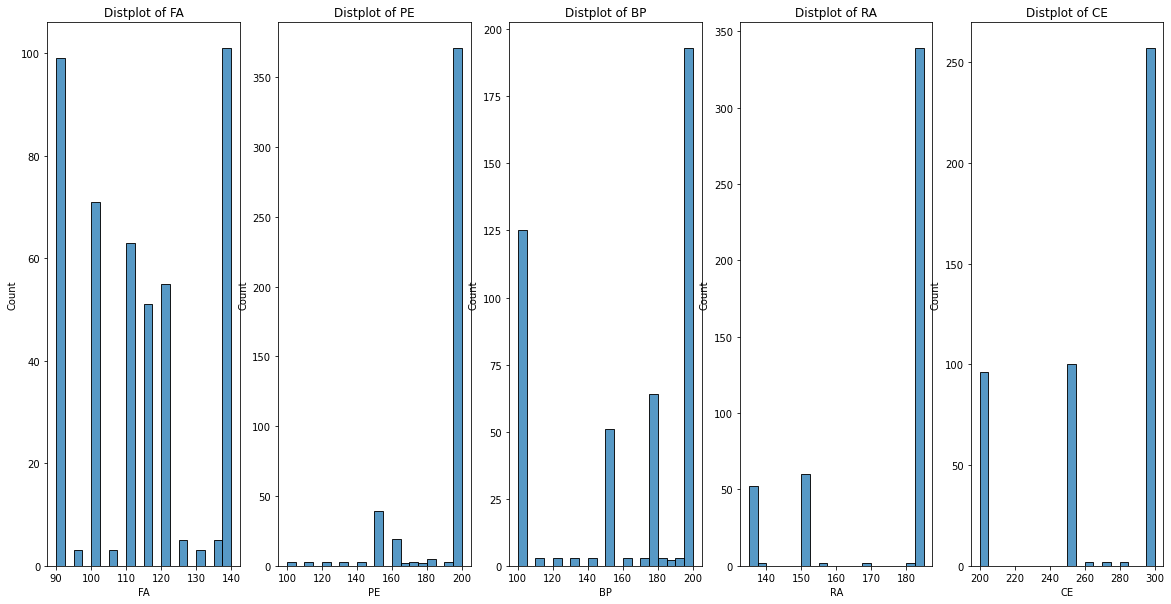

In [25]:
# Distribution of values for each attribute
import seaborn 

plt.figure(1 , figsize = (20 , 10))
n = 0 
for x in ['FA','PE','BP','RA','CE']:
    n += 1
    plt.subplot(1 , 5 , n)
    seaborn.histplot(catapult_data[x] , bins = 20, kde_kws={'bw':2})
    plt.title('Distplot of {}'.format(x))
plt.show()

In [26]:
#clean the data
#Drop the rows where at least one element is missing.
catapult_data=catapult_data.dropna()
print('shapeof the data',catapult_data.shape)
catapult_data

shapeof the data (459, 6)


,RA,FA,CE,PE,BP,distance
0,185,90,300,200,100,202.44
1,185,95,300,200,100,247.16
2,185,100,300,200,100,296.50
3,185,105,300,200,100,338.37
4,185,110,300,200,100,364.61
...,...,...,...,...,...,...
454,185,90,300,200,100,199.54
455,185,140,200,200,150,187.45
456,185,140,300,200,200,450.42
457,185,115,250,200,100,300.05


In [27]:
#seperate the data to input features and output
#names =[ pin elevation, firing angle, bungee position, release angle, cup elevation]
namesX = ['FA','PE','BP','RA','CE']
X_catapult_pd = pd.DataFrame(catapult_data[namesX])
X_catapult_pd

,FA,PE,BP,RA,CE
0,90,200,100,185,300
1,95,200,100,185,300
2,100,200,100,185,300
3,105,200,100,185,300
4,110,200,100,185,300
...,...,...,...,...,...
454,90,200,100,185,300
455,140,200,150,185,200
456,140,200,200,185,300
457,115,200,100,185,250


In [28]:
# output of the data
Y_catapult_pd = pd.DataFrame(catapult_data.distance)
Y_catapult_pd

,distance
0,202.44
1,247.16
2,296.50
3,338.37
4,364.61
...,...
454,199.54
455,187.45
456,450.42
457,300.05


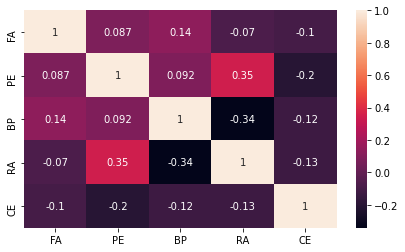

In [31]:
# Correlation heatmap 
plt.figure(figsize=(7,4)) 
seaborn.heatmap(X_catapult_pd.corr(),annot=True)
plt.show()

In [32]:
#sperate the data to train and test using Sklearn model selection 
import sklearn.model_selection
# We split the dataset into 2/3 training and 1/3 testing sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_catapult_pd, Y_catapult_pd, test_size=0.3)

# Then we split the training set further into 2/3 training and 1/3 validation sets.
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(X_train, Y_train, test_size=0.3)

In [33]:
#print the number of training and validation data
print(len(X_train),len(X_val),len(Y_train),len(Y_val))

224 97 224 97


In [34]:
X_train

,FA,PE,BP,RA,CE
432,90,200,200,185,200
389,140,200,200,185,200
177,135,180,185,155,260
304,90,200,100,185,300
420,90,200,150,185,250
...,...,...,...,...,...
336,140,200,200,185,300
439,90,200,200,185,300
440,90,200,200,185,200
417,115,200,200,185,200


In [35]:
import sagemaker
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.predictor import csv_serializer

In [36]:
# This is an object that represents the SageMaker session that we are currently operating in.
session = sagemaker.Session()

# get  An AWS IAM role
role = get_execution_role()
print(role)

arn:aws:iam::906056258627:role/service-role/AmazonSageMaker-ExecutionRole-20210224T135543


In [130]:
#local data directory. We need to make sure that it exists
data_dir = '../data/catapult'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
print(data_dir)

../data/catapult


In [131]:
#save  test, train and validation data to csv files
X_test.to_csv(os.path.join(data_dir, 'test.csv'), header=False, index=False)
# combine first the train and test data in one file then save them as csv file
pd.concat([Y_val, X_val], axis=1).to_csv(os.path.join(data_dir, 'validation.csv'), header=False, index=False)
pd.concat([Y_train, X_train], axis=1).to_csv(os.path.join(data_dir, 'train.csv'), header=False, index=False)

In [132]:
#folder name that the data will be uploaded
prefix = 'catapult-xgboost-pr'
#upload the data to s3 to usem them later in the model
test_location = session.upload_data(os.path.join(data_dir, 'test.csv'), key_prefix=prefix)
val_location = session.upload_data(os.path.join(data_dir, 'validation.csv'), key_prefix=prefix)
train_location = session.upload_data(os.path.join(data_dir, 'train.csv'), key_prefix=prefix)

In [18]:
test_location

's3://sagemaker-us-east-1-906056258627/catapult-xgboost-pr/test.csv'

In [74]:
pip install -U sagemaker


     |████████████████████████████████| 400 kB 16.7 MB/s eta 0:00:01
  Using cached smdebug_rulesconfig-1.0.1-py2.py3-none-any.whl (20 kB)
  Created wheel for sagemaker: filename=sagemaker-2.29.1-py2.py3-none-any.whl size=564258 sha256=59d21aca4c4466edd11f12456c4d9099b10228026e937ed43400c82ca0d0b84a
  Stored in directory: /home/ec2-user/.cache/pip/wheels/73/cf/7f/896dba4dde0032d0b511838ee75b07f66b5b59a6acdbb9c43d
Successfully built sagemaker
  Attempting uninstall: smdebug-rulesconfig
    Found existing installation: smdebug-rulesconfig 0.1.4
    Uninstalling smdebug-rulesconfig-0.1.4:
      Successfully uninstalled smdebug-rulesconfig-0.1.4
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 1.72.0
    Uninstalling sagemaker-1.72.0:
      Successfully uninstalled sagemaker-1.72.0
Note: you may need to restart the kernel to use updated packages.


In [20]:
# As stated above, we use this utility method to construct the image name for the training container.
xgboost_container = get_image_uri(session.boto_region_name,'xgboost', repo_version='1.0-1')

# Now that we know which container to use, we can construct the estimator object.
xgb = sagemaker.estimator.Estimator(xgboost_container, # The image name of the training container
                                    role,      # The IAM role to use (our current role in this case)
                                    train_instance_count=1, # The number of instances to use for training
                                    train_instance_type='ml.m4.xlarge', # The type of instance to use for training
                                    output_path='s3://{}/{}/output'.format(session.default_bucket(), prefix),
                                                                        # Where to save the output (the model artifacts)
                                    sagemaker_session=session) # The current SageMaker session

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


In [21]:
#set the hyperparameters of the model
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        objective='reg:linear',
                        early_stopping_rounds=10,
                        num_round=200)

In [22]:
#location of our train and validation data, to make sure that SageMaker know where is the data
s3_input_train = sagemaker.s3_input(s3_data=train_location, content_type='csv')
s3_input_validation = sagemaker.s3_input(s3_data=val_location, content_type='csv')
#fit the model with the data
xgb.fit({'train': s3_input_train, 'validation': s3_input_validation})

's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.


2021-03-09 18:18:31 Starting - Starting the training job...
2021-03-09 18:18:33 Starting - Launching requested ML instances......
2021-03-09 18:19:53 Starting - Preparing the instances for training......
2021-03-09 18:20:53 Downloading - Downloading input data...
2021-03-09 18:21:15 Training - Downloading the training image...
2021-03-09 18:21:58 Uploading - Uploading generated training model
2021-03-09 18:21:58 Completed - Training job completed
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[18:21:48] 224x5 matrix with 1120 e

In [ ]:
# least train rmse is 16.17 and least validation rmse:23.22 

In [23]:
# to test our model we need to build batch tranform functionality
xgb_transformer = xgb.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


In [24]:
#begin a batch transform job using our trained model applying it to the test data we previous stored in S3
xgb_transformer.transform(test_location, content_type='text/csv', split_type='Line')

In [25]:
xgb_transformer.wait()


................................
[2021-03-09:18:27:29:INFO] No GPUs detected (normal if no gpus installed)
[2021-03-09:18:27:29:INFO] No GPUs detected (normal if no gpus installed)
[2021-03-09:18:27:29:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;

worker_rlimit_nofile 4096;

events {
  worker_connections 2048;
}

[2021-03-09:18:27:29:INFO] No GPUs detected (normal if no gpus installed)
[2021-03-09:18:27:29:INFO] No GPUs detected (normal if no gpus installed)
[2021-03-09:18:27:29:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;

worker_rlimit_nofile 4096;

events {
  worker_connections 2048;
}

http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;

  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }

  server {
    listen 8080 deferred;
    client_max_body_size 0;

    keepalive_timeout 3;

    location ~ ^/(pin

In [26]:
# copy the output file from its S3 location and save it locally
!aws s3 cp --recursive $xgb_transformer.output_path $data_dir


download: s3://sagemaker-us-east-1-906056258627/sagemaker-xgboost-2021-03-09-18-22-13-840/test.csv.out to ../data/catapult/test.csv.out


In [27]:
#create a simple scatter plot between the predicted and actual distance values
Y_pred = pd.read_csv(os.path.join(data_dir, 'test.csv.out'), header=None)


Text(0.5, 1.0, 'orig distance vs Predicted distance')

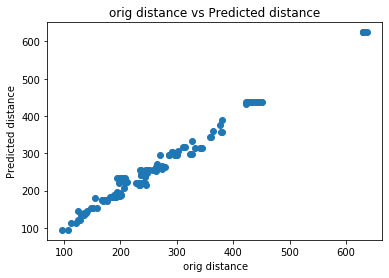

In [28]:
plt.scatter(Y_test, Y_pred)
plt.xlabel(" orig distance")
plt.ylabel("Predicted distance")
plt.title("orig distance vs Predicted distance")

In [29]:
# we can see it's not exactily a linear line so the model is not completely accurate

In [ ]:
#start to build Knn model

In [80]:
#sperate the data to train and test using Sklearn model selection 
import sklearn.model_selection
# We split the dataset into 2/3 training and 1/3 testing sets.
X_train_k, X_test_k, Y_train_k, Y_test_k = sklearn.model_selection.train_test_split(X_catapult_pd, Y_catapult_pd, test_size=0.3)

In [81]:
#scale the data using MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#scaled train data
x_train_scaled = scaler.fit_transform(X_train_k)
X_train_s = pd.DataFrame(x_train_scaled)
#scaled test data
x_test_scaled = scaler.fit_transform(X_test_k)
X_test_s = pd.DataFrame(x_test_scaled)

Y_train_s=Y_train_k
Y_test_s=Y_test_k

In [82]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [86]:
rmse_val = [] #to store rmse values for different k
for K in range(15):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_s, Y_train_s)  #fit the model
    pred=model.predict(X_test_s) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test_s,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 34.95626054727931
RMSE value for k=  2 is: 35.553087788096775
RMSE value for k=  3 is: 35.896538624012
RMSE value for k=  4 is: 36.59602919949499
RMSE value for k=  5 is: 34.42029261764139
RMSE value for k=  6 is: 34.16060420557599
RMSE value for k=  7 is: 34.762336094774255
RMSE value for k=  8 is: 35.68191287612106
RMSE value for k=  9 is: 37.37582015261836
RMSE value for k=  10 is: 39.30196694924709
RMSE value for k=  11 is: 41.2752624066877
RMSE value for k=  12 is: 42.94294990722107
RMSE value for k=  13 is: 45.90368588228085
RMSE value for k=  14 is: 47.028466227926856
RMSE value for k=  15 is: 48.79810148395123


<AxesSubplot:>

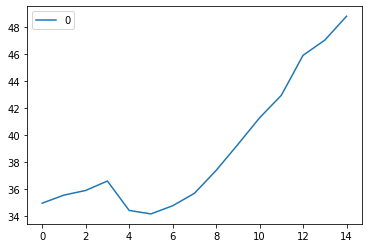

In [87]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#lest rmse is 34.15 at k=6

In [149]:
#print the accuracy
model.score(X_train_s,Y_train_s)


0.8145896940834727

In [152]:
#test the model and predict the distance
Xt = [[100,200,200,185,300]]; # ['FA','PE','BP','RA','CE']
print("Distance predicted by model: \t\t\t\t%.0f" % np.round(model.predict(scaler.transform(Xt)),1))

Distance predicted by model: 				304


In [ ]:
# build K-Nearest Neighbors (k-NN) in amazon sagemaker

In [136]:
#image name for the training container.
Knn_container = get_image_uri(session.boto_region_name,"knn", repo_version='1')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [140]:
# Now that we know which container to use, we can construct the estimator object.
Knn = sagemaker.estimator.Estimator(Knn_container, # The image name of the training container
                                    role,      # The IAM role to use (our current role in this case)
                                    train_instance_count=1, # The number of instances to use for training
                                    train_instance_type='ml.m4.xlarge',# The type of instance to use for training
                                    output_path='s3://{}/{}/output'.format(session.default_bucket(), prefix), # Where to save the output (the model artifacts)

                                    sagemaker_session=session) # The current SageMaker session

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [141]:
#set the hyperparameter
Knn.set_hyperparameters(predictor_type='regressor',
                        feature_dim=5,
                        k=5,
                        sample_size=(len(X_train))
                       )

In [142]:
#the location of our train and validation data, to make sure that the data is in csv format.
s3_input_train =  sagemaker.session.s3_input(s3_data=train_location, content_type='text/csv')
s3_input_validation = sagemaker.session.s3_input(s3_data=val_location, content_type='text/csv')
#fit the model with the data
Knn.fit({'train': s3_input_train, 'validation': s3_input_validation})

The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


2021-03-10 21:47:19 Starting - Starting the training job...
2021-03-10 21:47:43 Starting - Launching requested ML instancesProfilerReport-1615412838: InProgress
.........
2021-03-10 21:49:04 Starting - Preparing the instances for training......
2021-03-10 21:50:13 Downloading - Downloading input data
2021-03-10 21:50:13 Training - Downloading the training image.....Docker entrypoint called with argument(s): train
Running default environment configuration script
[03/10/2021 21:50:59 INFO 139892673075008] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'index_metric': u'L2', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'_log_level': u'info', u'feature_dim': u'auto', u'faiss_index_ivf_nlists': u'auto', u'epochs': u'1', u'index_type': u'faiss.Flat', u'_faiss_index_nprobe': u'5', u'_kvstore': u'dist_async', u'_num_kv_servers': u'1', u'mini_batch_size': u'5000'}
[03/10/2021 21:50:59 INFO 139892673075008] Merging

In [145]:
# Deploy the model to a Sagemaker endpoint
knn_predictor = Knn.deploy(initial_instance_count=1,instance_type='ml.m4.xlarge')


-------------------!

In [ ]:
#XGBoost in SageMaker (Hyperparameter Tuning)

In [53]:
from sagemaker.tuner import IntegerParameter, ContinuousParameter, HyperparameterTuner
#construct the estimator object.
xgb_hyperparameter_tuner = HyperparameterTuner(estimator = xgb, # The estimator object to use as the basis for the training jobs.
                                               objective_metric_name = 'validation:rmse', # The metric used to compare trained models.
                                               objective_type = 'Minimize', # Whether we wish to minimize or maximize the metric.
                                               max_jobs = 20, # The total number of models to train
                                               max_parallel_jobs = 3, # The number of models to train in parallel
                                               hyperparameter_ranges = {
                                                    'max_depth': IntegerParameter(3, 15),
                                                    'eta'      : ContinuousParameter(0.05, 0.6),
                                                    'min_child_weight': IntegerParameter(2, 12),
                                                    'subsample': ContinuousParameter(0.5, 0.9),
                                                    'gamma': ContinuousParameter(0, 10),
                                               })

In [54]:
#location of our train and validation data, to make sure that SageMaker know where is the data
s3_input_train = sagemaker.s3_input(s3_data=train_location, content_type='csv')
s3_input_validation = sagemaker.s3_input(s3_data=val_location, content_type='csv')
#fit the model with the data
xgb_hyperparameter_tuner.fit({'train': s3_input_train, 'validation': s3_input_validation})

's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.


In [55]:
xgb_hyperparameter_tuner.wait()


.....................................................................................................................................................................................................................................................................................................................................................................!


In [56]:
#train the best train job
xgb_hyperparameter_tuner.best_training_job()


'sagemaker-xgboost-210309-1858-018-02b3258b'

In [57]:
#set up a batch transform job to test the best model with a new estimator object from the results of the best training job.
xgb_attached = sagemaker.estimator.Estimator.attach(xgb_hyperparameter_tuner.best_training_job())

Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


2021-03-09 19:24:06 Starting - Preparing the instances for training
2021-03-09 19:24:06 Downloading - Downloading input data
2021-03-09 19:24:06 Training - Training image download completed. Training in progress.
2021-03-09 19:24:06 Uploading - Uploading generated training model
2021-03-09 19:24:06 Completed - Training job completedINFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter _tuning_objective_metric value validation:rmse to Json.
Returning the value itself
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[19:23:55] 2

In [ ]:
# we can see the least validation rmse is 16.93 which is less than the main main model so we expect accuracy of the (Hyperparameter Tuning) is higer.

In [58]:
#we have our best performing model to test the model we use the batch transform functionality.
#build a transformer object from our fit model.
xgb_transformer = xgb_attached.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


In [59]:
#begin a batch transform job using our trained model applying it to the test data we previous stored in S3
xgb_transformer.transform(test_location, content_type='text/csv', split_type='Line')


In [60]:
# wait until transform job is finished
xgb_transformer.wait()


..................................[2021-03-09:19:35:39:INFO] No GPUs detected (normal if no gpus installed)
[2021-03-09:19:35:39:INFO] No GPUs detected (normal if no gpus installed)
[2021-03-09:19:35:39:INFO] No GPUs detected (normal if no gpus installed)
[2021-03-09:19:35:39:INFO] No GPUs detected (normal if no gpus installed)
[2021-03-09:19:35:39:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;

worker_rlimit_nofile 4096;

events {
  worker_connections 2048;
}

[2021-03-09:19:35:39:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;

worker_rlimit_nofile 4096;

events {
  worker_connections 2048;
}

http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;

  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }

  server {
    listen 8080 deferred;
    client_max_body_size 0;

    keepalive_timeout 3;

    location ~ ^/(pi

In [61]:
# copy the output file from its S3 location and save it locally
!aws s3 cp --recursive $xgb_transformer.output_path $data_dir

download: s3://sagemaker-us-east-1-906056258627/sagemaker-xgboost-210309-1858-018-02b32-2021-03-09-19-30-09-771/test.csv.out to ../data/catapult/test.csv.out


In [62]:
#test the model.
Y_pred = pd.read_csv(os.path.join(data_dir, 'test.csv.out'), header=None)

Text(0.5, 1.0, 'orig distance vs Predicted distance')

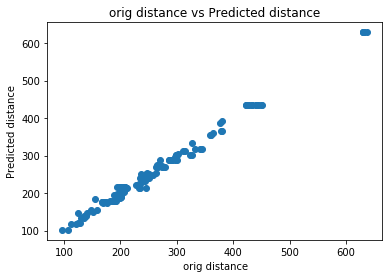

In [63]:
#create a simple scatter plot between the predicted and actual distance values
plt.scatter(Y_test, Y_pred)
plt.xlabel(" orig distance")
plt.ylabel("Predicted distance")
plt.title("orig distance vs Predicted distance")

In [99]:
#